<a href="https://colab.research.google.com/github/Himanshu-160/LanNet/blob/main/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving Model.py to Model.py


{'Model.py': b'import torch\nimport torch.nn as nn\nimport torch.nn.functional as F\n\n\n\nclass LanNet(nn.Module):\n    def __init__(self, num_language):\n        super(LanNet,self).__init__()\n        \n        self.C1 = nn.Conv2d(1,16,kernel_size=(3,3),stride=(1,1), padding=(2,2))\n        self.C2 = nn.Conv2d(16,32,kernel_size=(3,3),stride=(1,1) , padding=(2,2))\n        self.C3 = nn.Conv2d(32,64,kernel_size=(3,3),stride=(1,1), padding=(2,2))\n        self.C4 = nn.Conv2d(64,128,kernel_size=(3,5), padding=(2,3))\n        self.C5 = nn.Conv2d(128,256,kernel_size=(3,5), padding=(2,3))\n         \n        self.maxpool1 = nn.MaxPool2d((2,3),(2,2))\n        self.maxpool2 = nn.MaxPool2d((1,5),(1,5))\n        self.avgpool1= nn.AvgPool2d((3,3),(3,3))\n        \n        self.fc1 = nn.Linear(1024,64)\n        self.fc2 = nn.Linear(64,num_language)\n        self.dropout = nn.Dropout(0.25)\n\n        \n    def forward(self,x):\n        \n        x = self.maxpool1(F.relu(self.C1(x)))\n        x = s

In [7]:
%reload_ext autoreload
%autoreload 2
import tensor_convertor
import utils
import Model
from torch.utils.data import DataLoader
import json
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

In [8]:
DataConfig="/content/drive/MyDrive/LanNet/data_config.json"
HdfDataFile="/content/drive/MyDrive/LanNet/mfcc_dataset.hdf5"
Checkpoints="/content/drive/MyDrive/LanNet/Checkpoints"

In [ ]:
train_set,val_set=tensor_convertor.trainable_dataset(HdfDataFile,DataConfig)

In [ ]:
len(train_set)
len(val_set)

In [12]:
train_loader=DataLoader(train_set,batch_size=32)
val_loader=DataLoader(val_set,batch_size=1000)

In [13]:
config={}
with open(DataConfig,"r") as g:
    config=json.load(g)
labels=[]
for i in list(config.keys()):
    labels.append(config[i]["label"])

In [14]:
num_of_lan=max(labels)+1

In [15]:
model=Model.LanNet(num_of_lan)

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
learning_rate = 0.001
num_epochs = 20

dataset_sizes = {'train':len(train_set), 'val':len(val_set)}
model=model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

cuda


In [17]:
plot_training_loss=[]
plot_val_loss=[]

for i in range(1,num_epochs+1):
    print("Epoch ",i)
    train_loss,val_loss=utils.train(criterion, optimizer, model, train_loader,val_loader,device)
    
    print("Training Loss : ", train_loss.item()/dataset_sizes["train"])
    print("Validation Loss  : ", val_loss.item()/dataset_sizes["val"])
    plot_training_loss.append(train_loss.item()/dataset_sizes["train"])
    plot_val_loss.append(val_loss.item()/dataset_sizes["val"])
    
    print("Saving model for epoch {}".format(i))
    checkpoint={"epoch":i,"model_state":model.state_dict(),"optimizer_state":optimizer.state_dict(),"train_loss":plot_training_loss,"val_loss":plot_val_loss}
    filename="lannet_epoch_{}.pth".format(i)
    torch.save(checkpoint,os.path.join(Checkpoints,filename))

Epoch  1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Training Loss :  1.071631582267833
Validation Loss  :  0.9733983001287365
Saving model for epoch 1
Epoch  2
Training Loss :  0.8004850479475101
Validation Loss  :  0.508787927960547
Saving model for epoch 2
Epoch  3
Training Loss :  0.4493308903936743
Validation Loss  :  0.4447576182177845
Saving model for epoch 3
Epoch  4
Training Loss :  0.2833657627439435
Validation Loss  :  0.23930897409668583
Saving model for epoch 4
Epoch  5
Training Loss :  0.19343899835969044
Validation Loss  :  0.17918761271802783
Saving model for epoch 5
Epoch  6
Training Loss :  0.1349803767454576
Validation Loss  :  0.16023168154201206
Saving model for epoch 6
Epoch  7
Training Loss :  0.10912278926228129
Validation Loss  :  0.1612936564648879
Saving model for epoch 7
Epoch  8
Training Loss :  0.09119306890351615
Validation Loss  :  0.20477623018419525
Saving model for epoch 8
Epoch  9
Training Loss :  0.07149939802742261
Validation Loss  :  0.14890761328713734
Saving model for epoch 9
Epoch  10
Training Lo

Text(0, 0.5, 'Loss')

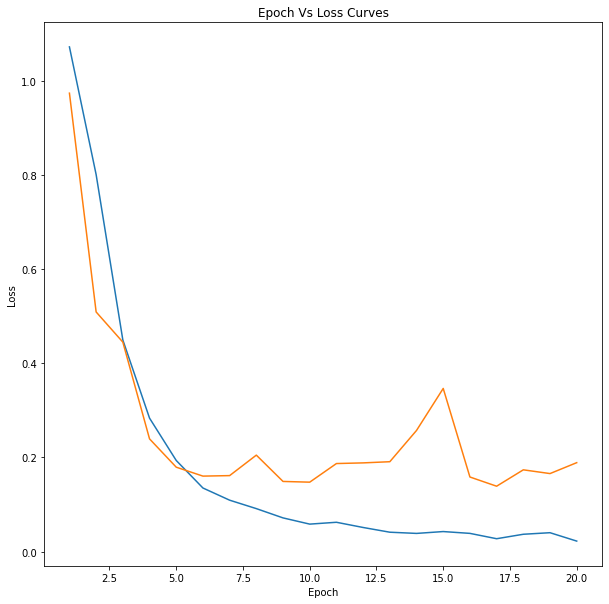

In [18]:
plot_iter=[i for i in range(1,num_epochs+1)]
plt.figure(figsize=(10,10))
plt.plot(plot_iter,plot_training_loss,label="Training loss")
plt.plot(plot_iter,plot_val_loss,label="Validation loss")
plt.title("Epoch Vs Loss Curves")
plt.xlabel("Epoch")
plt.ylabel("Loss")